In [11]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import rc
import seaborn as sns

In [12]:
font = {'size' : 15}

rc('font', **font)

In [13]:
# Colors and their names
colors_dict = {
    "Dark Pink": "#A3107C",
    "Medium Blue": "#23a1e0",
    "Light Green": "#8cb63c",
    "Teal": "#009682",
    "Dark Gray": "#404040",
    "Blue": "#4664AA",
    "Brown": "#A7822E",
    "Red": "#d9271f",
    "Orange": "#f4a500",
    "Yellow": "#fee900",
}

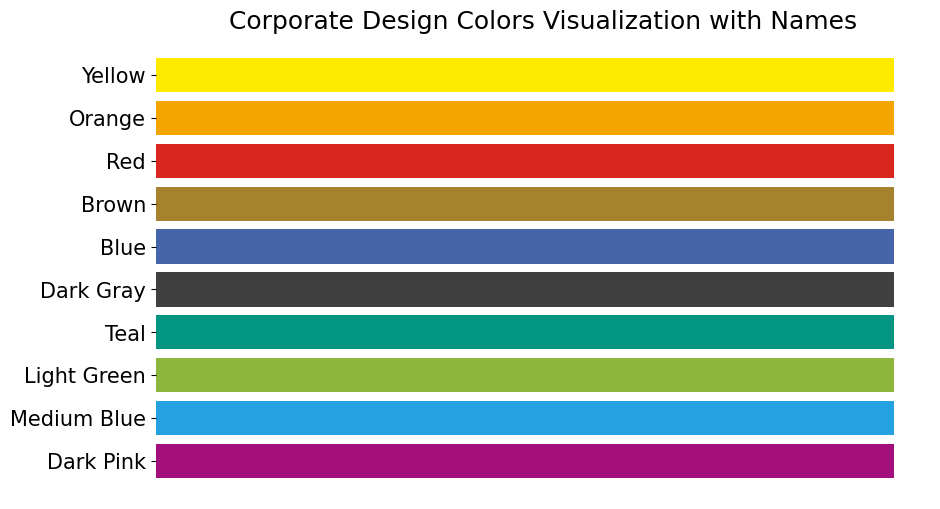

In [14]:
import matplotlib.pyplot as plt
import numpy as np


# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Number of colors
num_colors = len(colors_dict)

# Create a bar for each color
bars = ax.barh(range(num_colors), np.ones(num_colors), color=list(colors_dict.values()), edgecolor='none')

# Add the color names as labels
ax.set_yticks(range(num_colors))
ax.set_yticklabels(list(colors_dict.keys()))

# Remove x-ticks, spines
ax.set_xticks([])
for spine in ax.spines.values():
    spine.set_visible(False)

# Set title
ax.set_title('Corporate Design Colors Visualization with Names')

plt.show()

In [15]:
def parse_line(line):
    # Extract values using regular expressions
    class_id = re.search(r'class_id = (\d+)', line).group(1)
    name = re.search(r'name = ([^,]+)', line).group(1).strip()
    ap = re.search(r'ap = ([\d.]+)%', line).group(1)
    tp = re.search(r'TP = (\d+)', line).group(1)
    fp = re.search(r'FP = (\d+)', line).group(1)
    
    # Convert percentage to decimal
    ap = float(ap) / 100
    
    return [int(class_id), name, ap, int(tp), int(fp)]

def txt_to_dataframe(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    data = [parse_line(line) for line in lines if line.strip()]
    
    df = pd.DataFrame(data, columns=['class_id', 'name', 'ap', 'TP', 'FP'])
    
    return df



In [16]:
df_merged = txt_to_dataframe('results_merged.txt').sort_values(by='name')
df_unmerged = txt_to_dataframe('results_unmerged.txt').sort_values(by='name')
df_final = txt_to_dataframe('results_final.txt').sort_values(by='name')


In [17]:
df_unmerged

,class_id,name,ap,TP,FP
28,28,alnatura_bio,0.4167,0,0
21,21,asc_fisch,0.9890,11,0
0,0,bio_hexagon,0.8869,101,22
24,24,bio_initiative_huhn_hahn,1.0000,8,3
5,5,bioland,0.7453,20,6
23,23,bw_bio,0.9459,12,5
30,30,demeter,0.6645,9,4
19,19,dop_eu,0.8652,12,4
1,1,eco_stars,0.9555,77,10
14,14,edeka_bio,0.7835,28,6


In [18]:
# Adjusted function to apply the color gradient based on actual occurring values in 'ap' column

def plot_average_precision(df, x_col='name', y_col='ap', title='Average Precision (AP) for Each Class', xlabel='Class Name', ylabel='Average Precision (AP)'):
    """
    Plots the average precision for each class with a custom color gradient based on actual occurring values in 'ap' column,
    using colors defined in a global `colors_dict`.

    Parameters:
    - df: DataFrame containing the data to plot.
    - x_col: The name of the column to use for the x-axis.
    - y_col: The name of the column to use for the y-axis.
    - title: The title of the plot.
    - xlabel: The label for the x-axis.
    - ylabel: The label for the y-axis.
    """
    # Create a figure and axes object
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Use colors from colors_dict to define the gradient
    custom_colors = [colors_dict['Red'], colors_dict['Teal']]  # From bad to good
    custom_cmap = LinearSegmentedColormap.from_list("custom_gradient", custom_colors, N=256)
    
    # Use actual occurring values in 'ap' column for normalization
    min_ap, max_ap = df[y_col].min(), df[y_col].max()
    norm = plt.Normalize(min_ap, max_ap)
    sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=norm)
    sm.set_array([])
    
    # Get colors from the custom colormap based on actual 'ap' values
    colors = sm.to_rgba(df[y_col])
    
    # Plot using seaborn with the axes object
    sns.barplot(x=x_col, y=y_col, data=df, palette=colors, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    
    # Manually add colorbar to the axes, adjusting label for actual 'ap' range
    cbar = fig.colorbar(sm, ax=ax, orientation='vertical')
    cbar.set_label(f'Average Precision (AP) Range: {min_ap:.2f} to {max_ap:.2f}', rotation=270, labelpad=15)
    
    plt.tight_layout()
    # Replace spaces with underscores and remove special characters for the filename
    filename = title.replace(' ', '_').translate({ord(c): "" for c in "!@#$%^&*()[]{};:,./<>?\|`~-=+"})
    plt.savefig(f'visualizations/{filename}.png')  # Saves the plot with the title as filename
    plt.show()


<>:45: SyntaxWarning: invalid escape sequence '\|'
<>:45: SyntaxWarning: invalid escape sequence '\|'
C:\Users\mucki\AppData\Local\Temp\ipykernel_17928\2601559164.py:45: SyntaxWarning: invalid escape sequence '\|'
  filename = title.replace(' ', '_').translate({ord(c): "" for c in "!@#$%^&*()[]{};:,./<>?\|`~-=+"})


C:\Users\mucki\AppData\Local\Temp\ipykernel_17928\2601559164.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_col, y=y_col, data=df, palette=colors, ax=ax)
C:\Users\mucki\AppData\Local\Temp\ipykernel_17928\2601559164.py:33: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x=x_col, y=y_col, data=df, palette=colors, ax=ax)
C:\Users\mucki\AppData\Local\Temp\ipykernel_17928\2601559164.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


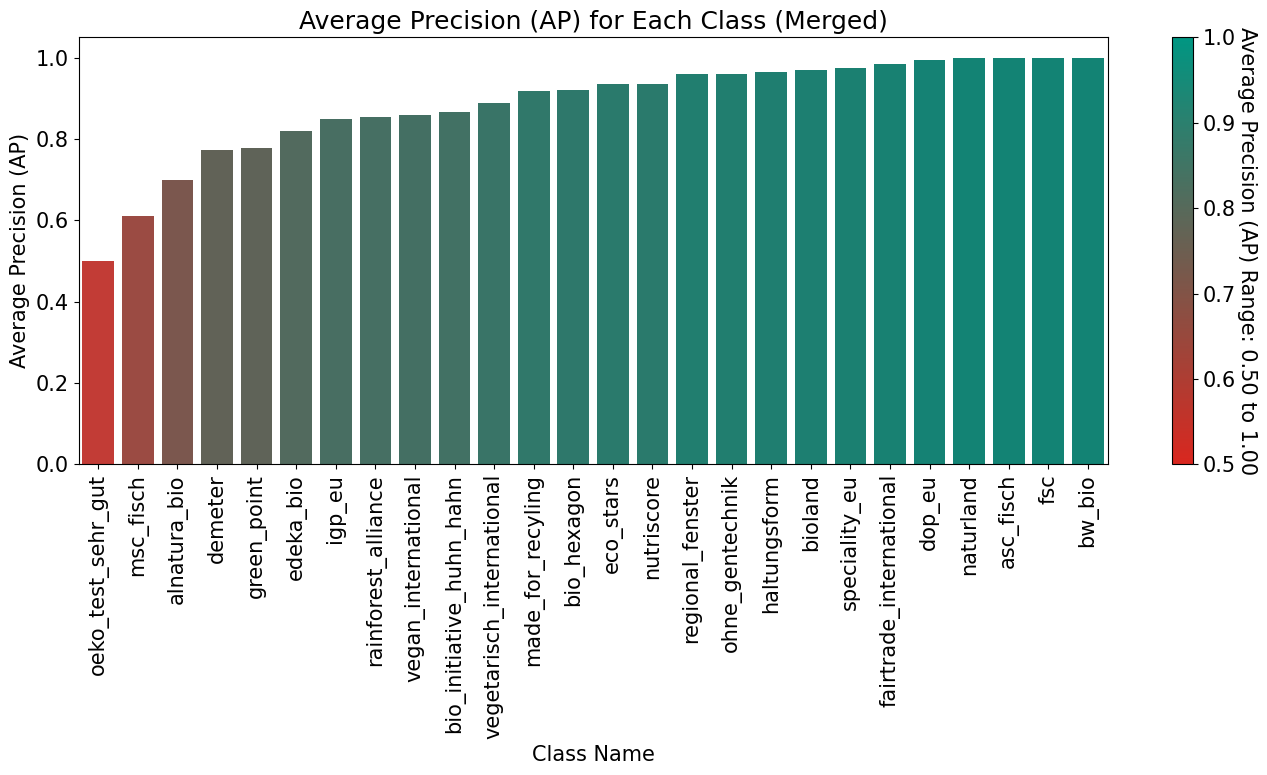

In [19]:
plot_average_precision(df_merged.sort_values("ap"), title='Average Precision (AP) for Each Class (Merged)')

C:\Users\mucki\AppData\Local\Temp\ipykernel_17928\2601559164.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_col, y=y_col, data=df, palette=colors, ax=ax)
C:\Users\mucki\AppData\Local\Temp\ipykernel_17928\2601559164.py:33: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x=x_col, y=y_col, data=df, palette=colors, ax=ax)
C:\Users\mucki\AppData\Local\Temp\ipykernel_17928\2601559164.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


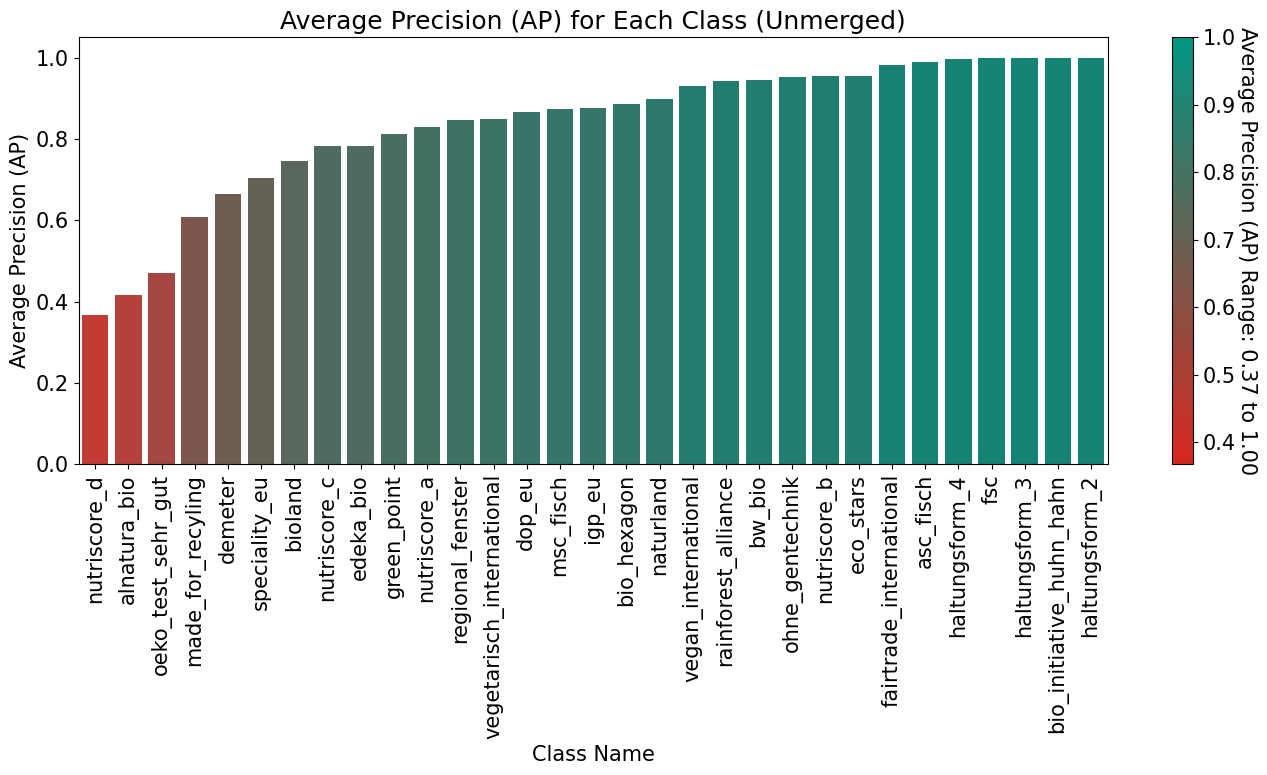

In [20]:
plot_average_precision(df_unmerged.sort_values("ap"), title='Average Precision (AP) for Each Class (Unmerged)')

C:\Users\mucki\AppData\Local\Temp\ipykernel_17928\2601559164.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_col, y=y_col, data=df, palette=colors, ax=ax)
C:\Users\mucki\AppData\Local\Temp\ipykernel_17928\2601559164.py:33: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x=x_col, y=y_col, data=df, palette=colors, ax=ax)
C:\Users\mucki\AppData\Local\Temp\ipykernel_17928\2601559164.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


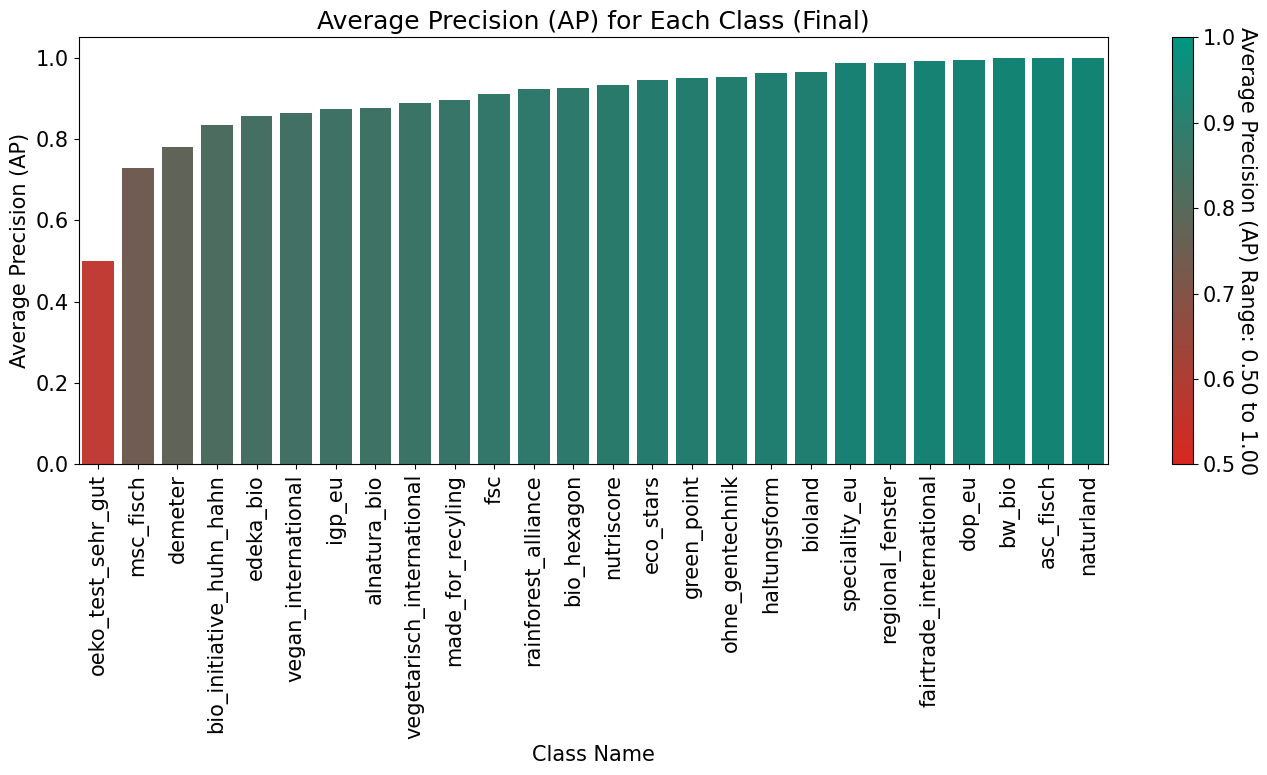

In [21]:
plot_average_precision(df_final.sort_values("ap"), title='Average Precision (AP) for Each Class (Final)')

In [51]:
def plot_multiple_ap_scores(dfs, df_labels, title = 'Average Precision (AP) for Each Class'):
    """
    Plots a grouped bar chart of AP scores for each class from multiple DataFrames, using colors from 'colors_dict'.
    
    Parameters:
    dfs (list of pd.DataFrame): List of DataFrames containing AP scores for classes.
    df_labels (list of str): List of labels corresponding to each DataFrame.
    """
    # Assuming 'colors_dict' is defined globally and contains color names as keys
    global colors_dict
    
    # Create a list of colors from 'colors_dict' values
    colors_list = list(colors_dict.values())
    
    # Ensure there are enough colors for the labels
    if len(df_labels) > len(colors_list):
        raise ValueError("Not enough colors in 'colors_dict' for each label in 'df_labels'")
    
    # Map each label to a color from 'colors_list'
    palette = {label: colors_list[i % len(colors_list)] for i, label in enumerate(df_labels)}
    
    # Combine all dataframes into a single dataframe
    combined_df = pd.DataFrame()
    for df, label in zip(dfs, df_labels):
        df_temp = df.copy()
        df_temp['source'] = label
        combined_df = pd.concat([combined_df, df_temp], ignore_index=True)
    
    # Create the bar plot with the defined palette
    plt.figure(figsize=(14, 8))
    sns.barplot(x='name', y='ap', hue='source', data=combined_df, palette=palette)
    plt.xticks(rotation=90)
    plt.xlabel('Class Name')
    plt.ylabel('Average Precision (AP)')
    plt.title(title)
    plt.legend(loc="upper right", ncol=3)
    plt.tight_layout()
    plt.ylim(0,1.19)
    # Replace spaces with underscores and remove special characters for the filename
    filename = title.replace(' ', '_').translate({ord(c): "" for c in "!@#$%^&*()[]{};:,./<>?\|`~-=+"})
    plt.savefig(f'visualizations/{filename}.png')  # Saves the plot with the title as filename
    plt.show()

<>:40: SyntaxWarning: invalid escape sequence '\|'
<>:40: SyntaxWarning: invalid escape sequence '\|'
C:\Users\mucki\AppData\Local\Temp\ipykernel_17928\3633920691.py:40: SyntaxWarning: invalid escape sequence '\|'
  filename = title.replace(' ', '_').translate({ord(c): "" for c in "!@#$%^&*()[]{};:,./<>?\|`~-=+"})


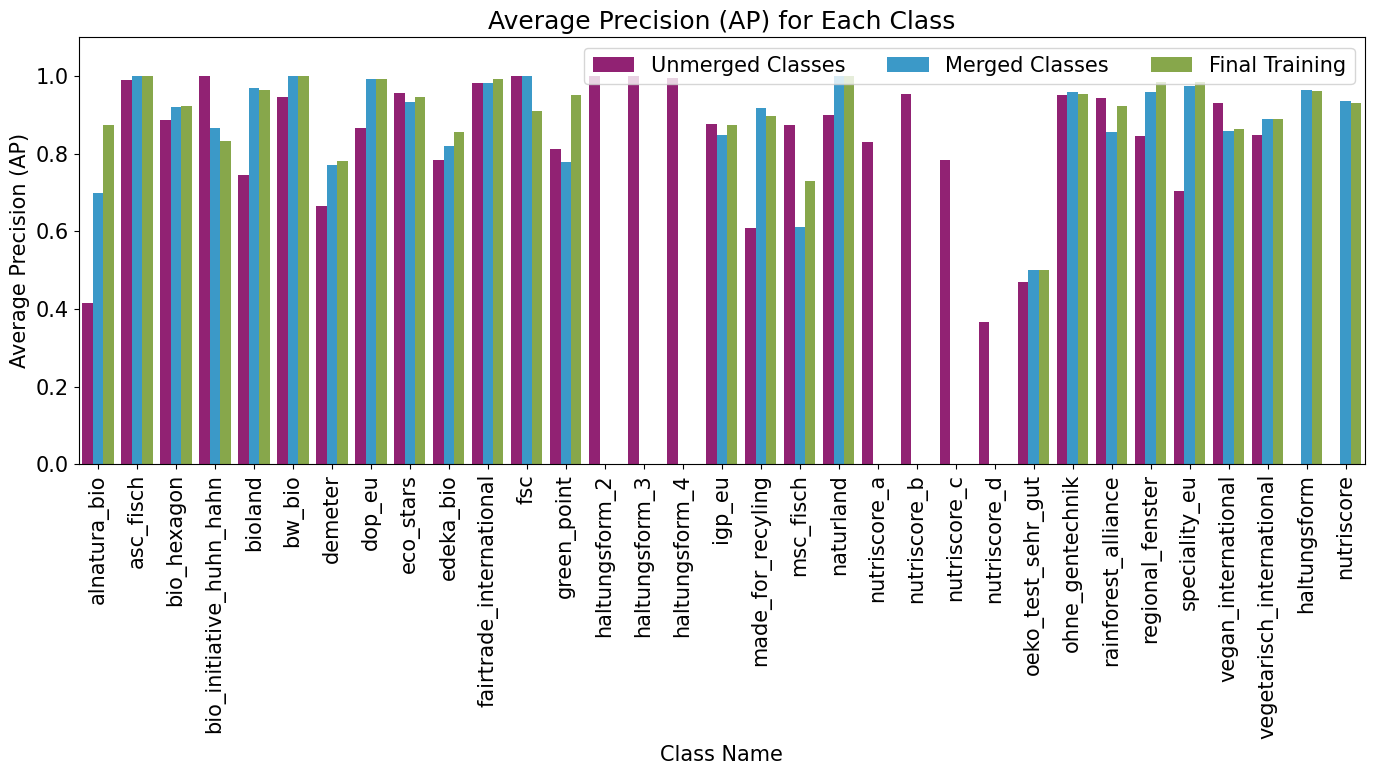

In [52]:
# Labels for the dataframes
df_labels = ['Unmerged Classes', 'Merged Classes', 'Final Training']

# Call the function with the example dataframes
plot_multiple_ap_scores([df_unmerged, df_merged, df_final], df_labels)


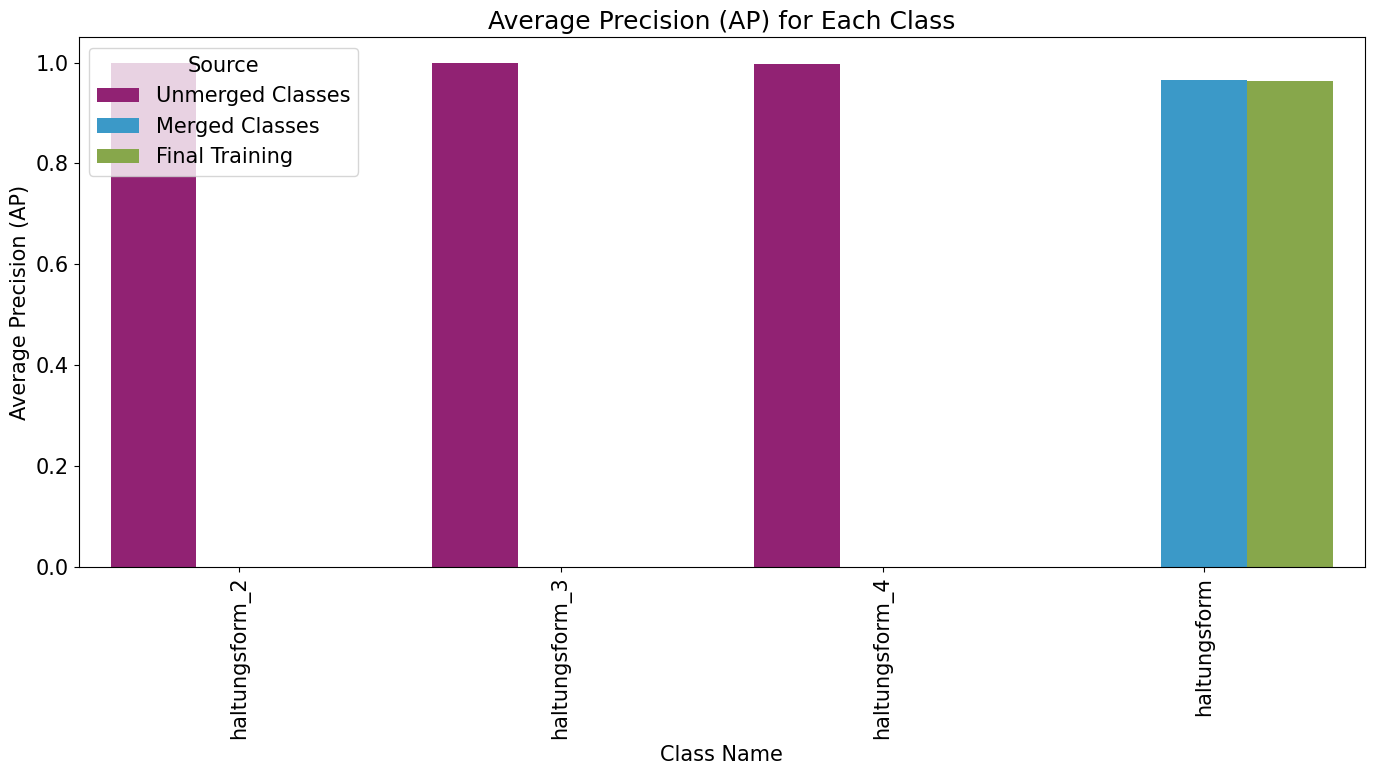

C:\Users\mucki\AppData\Local\Temp\ipykernel_17928\575839670.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_haltungsform_final['name'] = df_haltungsform_final['name'].str.replace('haltungsform', 'haltungsform_final')
C:\Users\mucki\AppData\Local\Temp\ipykernel_17928\2601559164.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_col, y=y_col, data=df, palette=colors, ax=ax)
C:\Users\mucki\AppData\Local\Temp\ipykernel_17928\2601559164.py:33: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barp

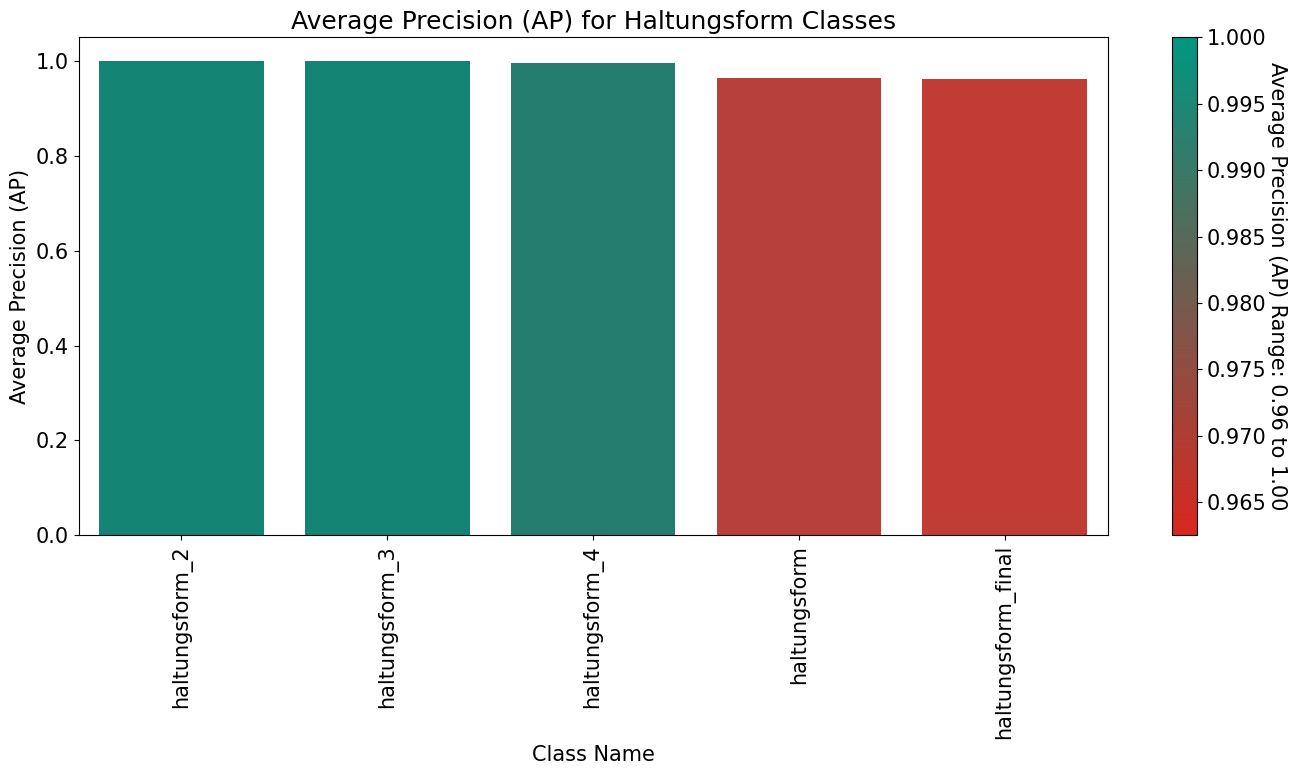

In [24]:
# Plot the effect on merged classes

df_haltungsform_unmerged = df_unmerged[df_unmerged['name'].str.contains('haltungsform')]  # Filter rows containing 'haltungsform'
df_haltungsform_merged = df_merged[df_merged['name'].str.contains('haltungsform')]  # Filter rows containing 'haltungsform'
df_haltungsform_final = df_final[df_final['name'].str.contains('haltungsform')]  # Filter rows containing 'haltungsform'


plot_multiple_ap_scores([df_haltungsform_unmerged, df_haltungsform_merged, df_haltungsform_final], df_labels)


df_haltungsform_final['name'] = df_haltungsform_final['name'].str.replace('haltungsform', 'haltungsform_final')
df_haltungsform_combined = pd.concat([df_haltungsform_unmerged, df_haltungsform_merged, df_haltungsform_final], ignore_index=True)  # Combine all dataframes
plot_average_precision(df_haltungsform_combined, title='Average Precision (AP) for Haltungsform Classes')


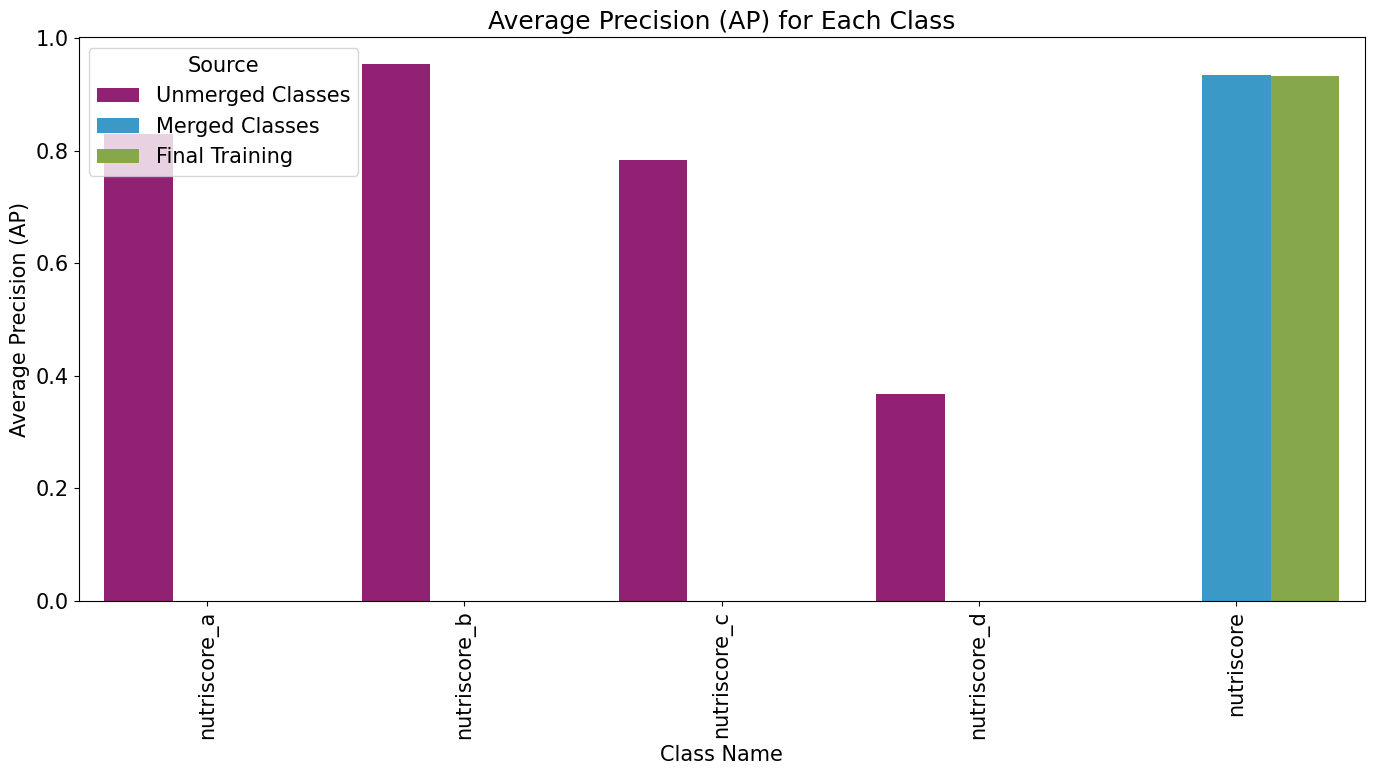

C:\Users\mucki\AppData\Local\Temp\ipykernel_17928\2916092780.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nutriscore_final['name'] = df_haltungsform_final['name'].str.replace('nutriscore', 'nutriscore_final')
C:\Users\mucki\AppData\Local\Temp\ipykernel_17928\2601559164.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_col, y=y_col, data=df, palette=colors, ax=ax)
C:\Users\mucki\AppData\Local\Temp\ipykernel_17928\2601559164.py:33: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x=

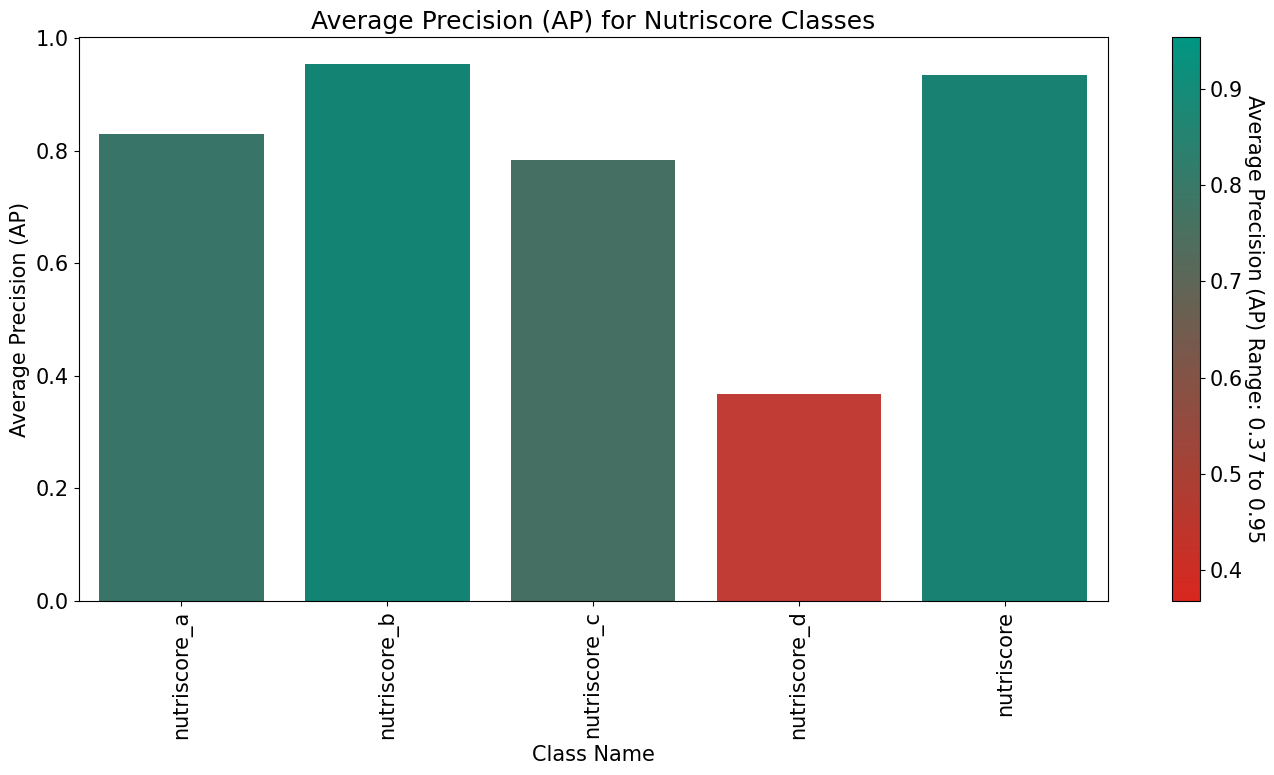

In [25]:
df_nutriscore_unmerged = df_unmerged[df_unmerged['name'].str.contains('nutriscore')]  # Filter rows containing 'nutriscore'
df_nutriscore_merged = df_merged[df_merged['name'].str.contains('nutriscore')]  # Filter rows containing 'nutriscore'
df_nutriscore_final = df_final[df_final['name'].str.contains('nutriscore')]  # Filter rows containing 'nutriscore'


plot_multiple_ap_scores([df_nutriscore_unmerged, df_nutriscore_merged, df_nutriscore_final], df_labels)

df_nutriscore_final['name'] = df_haltungsform_final['name'].str.replace('nutriscore', 'nutriscore_final')
df_nutriscore_combined = pd.concat([df_nutriscore_unmerged, df_nutriscore_merged, df_nutriscore_final], ignore_index=True)  # Combine all dataframes
plot_average_precision(df_nutriscore_combined, title='Average Precision (AP) for Nutriscore Classes')



# Confusion Matrix of Overal TP FP FN

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def create_confusion_matrix(tp, fp, fn):
    """
    Creates a confusion matrix for an object detection model.
    
    Parameters:
    tp (int): Number of true positives
    fp (int): Number of false positives
    fn (int): Number of false negatives
    
    Returns:
    pd.DataFrame: Confusion matrix
    """
    # Define confusion matrix
    confusion_matrix = np.array([[tp, fp], [fn, 0]])
    
    # Define labels
    labels = ['Predicted Positive', 'Predicted Negative']
    categories = ['Actual Positive', 'Actual Negative']
    
    # Create DataFrame for heatmap
    df_cm = pd.DataFrame(confusion_matrix, index=categories, columns=labels)
    
    return df_cm

def plot_confusion_matrix(df_cm, title='Confusion Matrix'):
    """
    Plots the confusion matrix using a heatmap.
    
    Parameters:
    df_cm (pd.DataFrame): DataFrame containing confusion matrix
    title (str): Title for the confusion matrix plot
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    # Replace spaces with underscores and remove special characters for the filename
    filename = title.replace(' ', '_').translate({ord(c): "" for c in "!@#$%^&*()[]{};:,./<>?\|`~-=+"})
    plt.savefig(f'visualizations/{filename}.png')  # Saves the plot with the title as filename
    plt.show()




<>:44: SyntaxWarning: invalid escape sequence '\|'
<>:44: SyntaxWarning: invalid escape sequence '\|'
C:\Users\mucki\AppData\Local\Temp\ipykernel_17928\4216734469.py:44: SyntaxWarning: invalid escape sequence '\|'
  filename = title.replace(' ', '_').translate({ord(c): "" for c in "!@#$%^&*()[]{};:,./<>?\|`~-=+"})


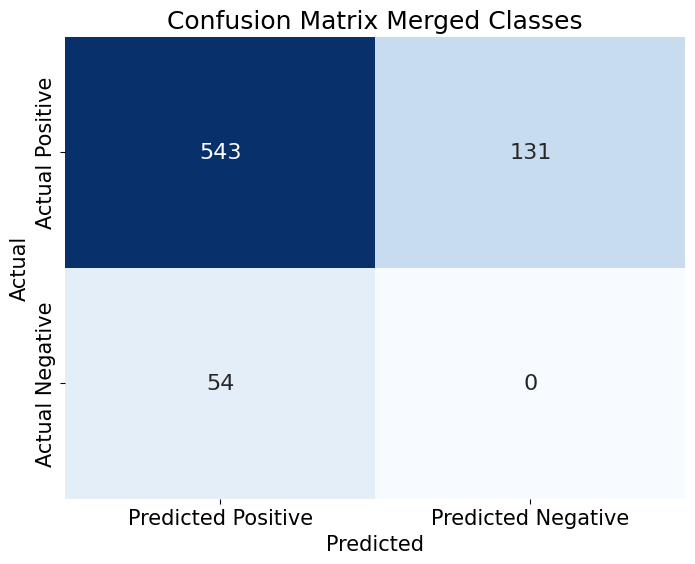

In [27]:
# Confusion matrix: merged classes
tp = 543
fp = 131
fn = 54

# Create confusion matrix
df_cm = create_confusion_matrix(tp, fp, fn)

# Plot confusion matrix with custom title
plot_confusion_matrix(df_cm, title='Confusion Matrix Merged Classes')

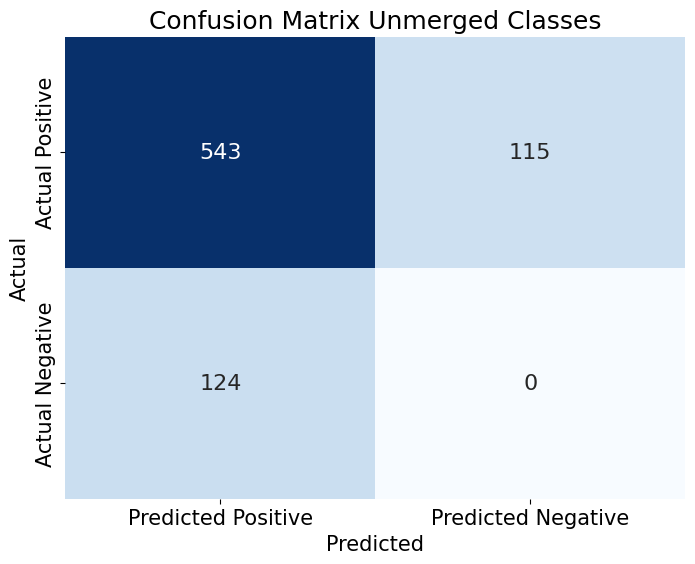

In [28]:
# Confusion matrix: unmerged classes
tp = 543
fp = 115
fn = 124

# Create confusion matrix
df_cm = create_confusion_matrix(tp, fp, fn)

# Plot confusion matrix with custom title
plot_confusion_matrix(df_cm, title='Confusion Matrix Unmerged Classes')

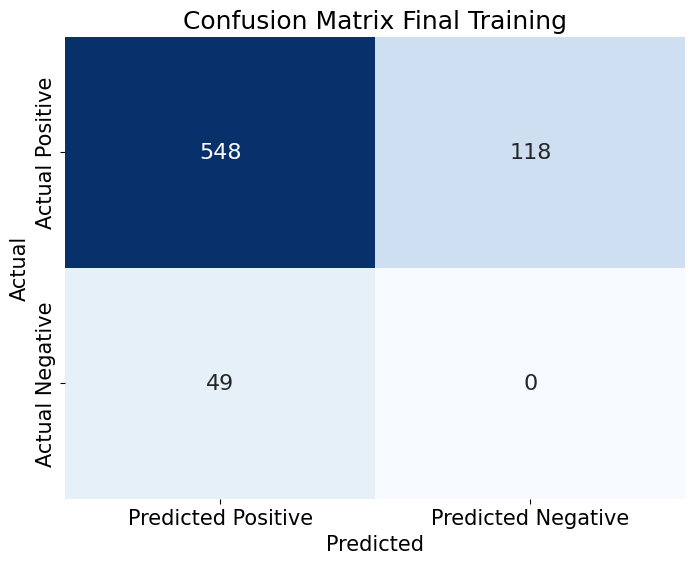

In [29]:
# Confusion matrix: final training
tp = 548
fp = 118
fn = 49

# Create confusion matrix
df_cm = create_confusion_matrix(tp, fp, fn)

# Plot confusion matrix with custom title
plot_confusion_matrix(df_cm, title='Confusion Matrix Final Training')